<a href="https://colab.research.google.com/github/swamyappu/Assignment-9/blob/main/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adding one more hidden layer to the autoencoder:

In [ ]:
import keras
from keras import layers
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np

encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = keras.Input(shape=(784,))
#Hidden layer
hidden_1 = layers.Dense(128,activation='relu')(input_img)

encoded = layers.Dense(encoding_dim, activation='relu')(hidden_1)

#Added one more hidden layer
hidden_2 = layers.Dense(128, activation='relu')(encoded)

decoded = layers.Dense(784, activation='sigmoid')(hidden_2)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 3s 5ms/step - loss: 0.3773 - val_loss: 0.3155
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3057 - val_loss: 0.3017
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2965 - val_loss: 0.2960
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2916 - val_loss: 0.2917
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2884 - val_loss: 0.2896


#Doing the prediction on the test data and visualizing the reconstructed and original test data:

313/313 [==============================] - 1s 2ms/step


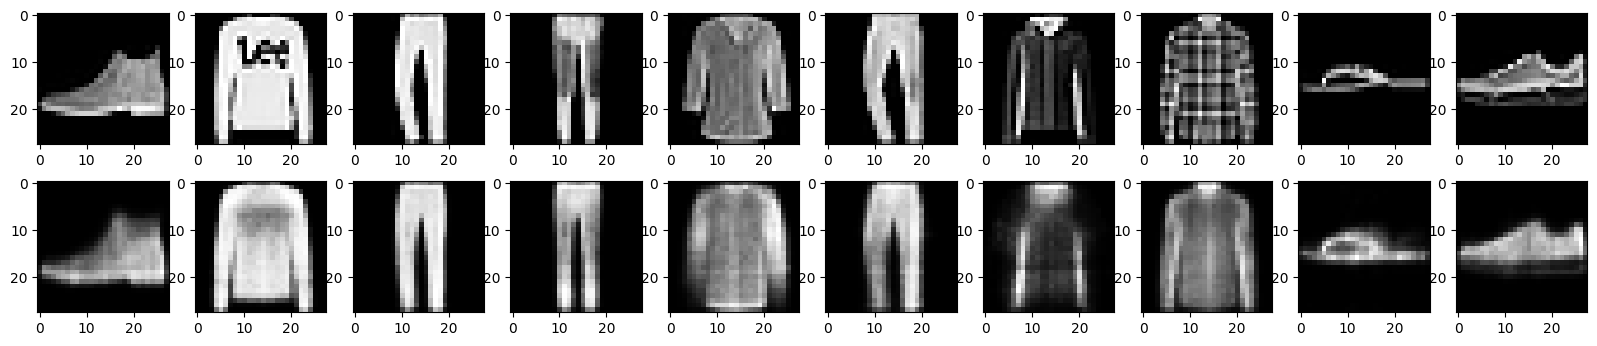

In [ ]:
import matplotlib.pyplot as plt

# Encode and decode some images from the test set
decoded_imgs = autoencoder.predict(x_test)

# Plot the original images and their reconstructions
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    
    # Decoded images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()

plt.show()


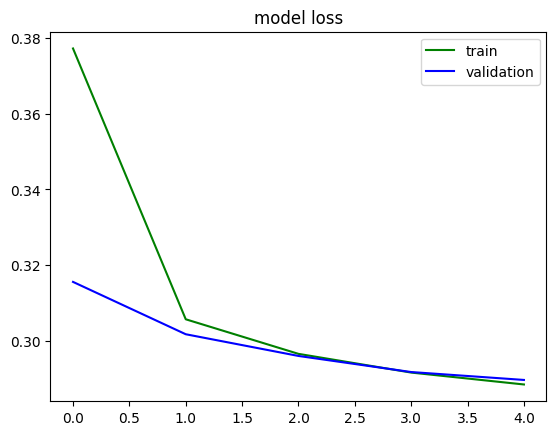

In [ ]:
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="blue")
plt.title('model loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#Doing the prediction on the test data using the denoising autoencoder and visualizing the reconstructed and original test data:

Epoch 1/5
235/235 [==============================] - 2s 4ms/step - loss: 0.6059 - val_loss: 0.5818
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.5771 - val_loss: 0.5749
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.5722 - val_loss: 0.5710
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.5691 - val_loss: 0.5690
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
Before Adding Noies


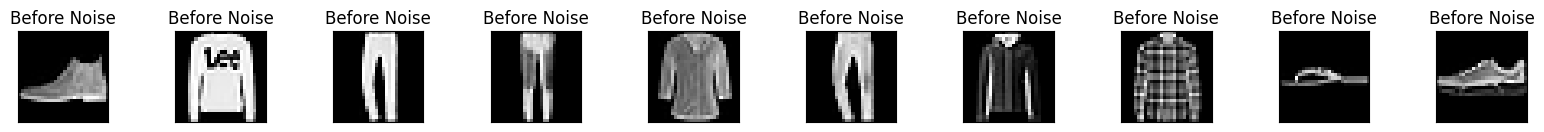

After Adding Noies


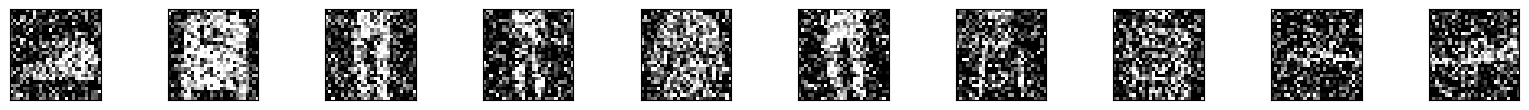

After Reconstruction


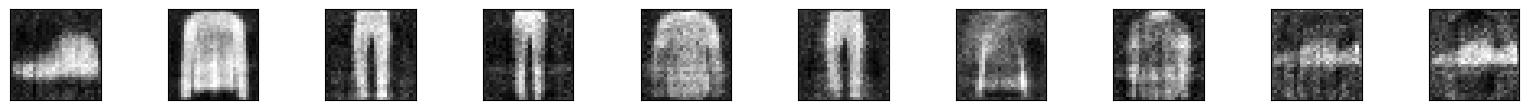

In [ ]:
from keras.layers import Input as In, Dense as Den
from keras.models import Model as Mod
from keras.datasets import fashion_mnist
import numpy as npy
import matplotlib.pyplot as plot

# Define the input shape
in_shape = (784,)

# Define the encoding dimension
en_dim = 32

# Define the input placeholder
in_img = In(shape=in_shape)

# Define the encoder layers
encod = Den(en_dim, activation='relu')(in_img)

# Define the decoder layers
decod = Den(784, activation='sigmoid')(encod)

# Define the autoencoder model
autoencod = Mod(in_img, decod)

# Compile the model
autoencod.compile(optimizer='adam', loss='binary_crossentropy')

# Load the Fashion MNIST dataset
(x_tr, _), (x_te, _) = fashion_mnist.load_data()

# Normalize the input images
x_tr = x_tr.astype('float32') / 255.
x_te = x_te.astype('float32') / 255.

# Flatten the input images
x_tr = x_tr.reshape((len(x_tr), npy.prod(x_tr.shape[1:])))
x_te = x_te.reshape((len(x_te), npy.prod(x_te.shape[1:])))

# Introduce noise to the training and test images
noise_factor = 0.5
x_train_noisy = npy.clip(x_tr + noise_factor * npy.random.normal(loc=0.0, scale=1.0, size=x_tr.shape), 0., 1.)
x_test_noisy = npy.clip(x_te + noise_factor * npy.random.normal(loc=0.0, scale=1.0, size=x_te.shape), 0., 1.)

# Train the autoencoder
hist = autoencod.fit(x_train_noisy, x_train_noisy,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# Generate denoised images
decod_imgs = autoencod.predict(x_test_noisy)

# Display the original and denoised images
n = 10
plot.figure(figsize=(20, 4))
print('Before Adding Noies')
for i in range(n): 
    ax = plt.subplot(3, n, i + 1)
    plot.imshow(x_test[i].reshape(28, 28))
    plot.title('Before Noise')
    plot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plot.show()

plot.figure(figsize=(20, 4))
print('After Adding Noies')
for i in range(n):
    ax = plt.subplot(3, n, i + 1 + n)
    plot.imshow(x_test_noisy[i].reshape(28, 28))
    plot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plot.show()

plot.figure(figsize=(20, 4))
print('After Reconstruction')
for i in range(n):
    ax = plt.subplot(3, n, i + 1 + n + n)
    plot.imshow(decod_imgs[i].reshape(28, 28))
    plot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plot.show()


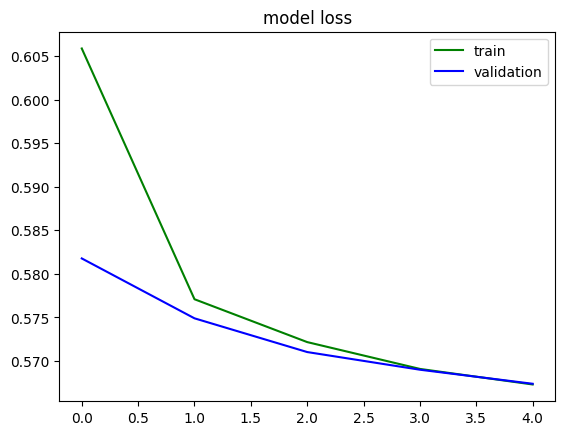

In [ ]:
plot.plot(hist.history['loss'], color="green")
plot.plot(hist.history['val_loss'], color="blue")
plot.title('model loss')
plot.legend(['train', 'validation'], loc='upper right')
plot.show()